In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

## Reading data 
Final CSV files generated by *merge_data.py*

In [3]:
df_p1 = pd.read_csv("C:/Users/marim/Documents/Faculdade/TCC/patient_act_data_CSV/1379-38_data_final.csv")

In [4]:
df_p1.tail()

,Date,Time,X,Y,Z,T,Sleep,activity_index
16282795,2018-08-03,10:23:30,-0.0869,0.3985,-0.8478,22.9,0,0.120275
16282796,2018-08-03,10:23:30,-0.0673,0.3398,-0.8679,22.9,0,0.120275
16282797,2018-08-03,10:23:30,-0.0595,0.3516,-0.9122,22.9,0,0.120275
16282798,2018-08-03,10:23:30,-0.0477,0.4415,-0.9525,22.9,0,0.120275
16282799,2018-08-03,10:23:30,-0.0477,0.5236,-0.9605,22.9,0,0.120275


In [5]:
df_p1.head()

,Date,Time,X,Y,Z,T,Sleep,activity_index
0,2018-07-27,15:55:55,-0.0359,-0.2505,-1.0169,36.2,0,0.157358
1,2018-07-27,15:55:55,-0.1655,-0.1098,-0.8518,36.2,0,0.157358
2,2018-07-27,15:55:55,-0.1026,-0.1528,-0.9203,36.2,0,0.157358
3,2018-07-27,15:55:55,-0.0084,-0.1958,-0.9806,36.2,0,0.157358
4,2018-07-27,15:55:55,-0.0045,-0.2154,-0.9243,36.2,0,0.157358


### Analisar quais variáveis possuem distribuição normal



Em geral, usamos a normalização quando não sabemos a distribuição dos dados, ou sabemos que não é uma ditribuição gaussiana (normal), sendo uma ténica útil principalmente em algoritmos que não fazem suposições sobre a distribuição, como KNN ou redes neurais. Já a padronização é mais usada quando se sabe que a distribuição dos dados segue uma curva de distribuição gaussiana, ou muito próxima.

Para analisar se uma distribuição é normal podemos aplicar o teste estatístico Shapiro-Wilk. A hipótese nula deste teste é de que a variável possui distribuição normal. Portanto, um valor de p < 0.05 indica que a hipótese nula deve ser rejeitada, ou seja, os dados não possuem distribuição normal.

In [6]:
# Aplicando o teste na variável X:
shapiro_teste_X = stats.shapiro(df_p1['X'])
print("X: ", shapiro_teste_X)

# Aplicando o teste na variável Y:
shapiro_teste_Y = stats.shapiro(df_p1['Y'])
print("Y: ", shapiro_teste_Y)

# Aplicando o teste na variável Z:
shapiro_teste_Z = stats.shapiro(df_p1['Z'])
print("Z: ", shapiro_teste_Z)

# Aplicando o teste na variável T:
shapiro_teste_T = stats.shapiro(df_p1['T'])
print("T: ", shapiro_teste_T)

# Aplicando o teste na variável Activity index:
shapiro_teste_act_id = stats.shapiro(df_p1['activity_index'])
print("Activity index: : ", shapiro_teste_act_id)


C:\Users\marim\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16282800.
  res = hypotest_fun_out(*samples, **kwds)


X:  ShapiroResult(statistic=np.float64(0.92761041295733), pvalue=np.float64(2.65284308182122e-149))
Y:  ShapiroResult(statistic=np.float64(0.9918844968382176), pvalue=np.float64(8.579094635391916e-89))
Z:  ShapiroResult(statistic=np.float64(0.9459633722098252), pvalue=np.float64(2.6841242150957377e-140))
T:  ShapiroResult(statistic=np.float64(0.8377520048050485), pvalue=np.float64(1.2466802664913375e-175))
Activity index: :  ShapiroResult(statistic=np.float64(0.8847009948288341), pvalue=np.float64(3.185846068729027e-164))


Como todos o p-valores são maiores que 0.005, aplicamos a **padronização** em todas as colunas. 

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_p1[['X']])
df_p1['X'] = scaler.transform(df_p1[['X']])

scaler.fit(df_p1[['Y']])
df_p1['Y'] = scaler.transform(df_p1[['Y']])

scaler.fit(df_p1[['Z']])
df_p1['Z'] = scaler.transform(df_p1[['Z']])

scaler.fit(df_p1[['T']])
df_p1['T'] = scaler.transform(df_p1[['T']])

scaler.fit(df_p1[['activity_index']])
df_p1['activity_index'] = scaler.transform(df_p1[['activity_index']])

print(df_p1.head())

         Date      Time         X         Y         Z         T  Sleep  \
0  2018-07-27  15:55:55  0.694715 -0.492534 -1.573480  2.485447      0   
1  2018-07-27  15:55:55  0.438265 -0.190663 -1.306789  2.485447      0   
2  2018-07-27  15:55:55  0.562730 -0.282919 -1.417439  2.485447      0   
3  2018-07-27  15:55:55  0.749131 -0.375176 -1.514844  2.485447      0   
4  2018-07-27  15:55:55  0.756849 -0.417227 -1.423901  2.485447      0   

   activity_index  
0        1.071632  
1        1.071632  
2        1.071632  
3        1.071632  
4        1.071632  


### Dividindo dados em treino e teste

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

In [9]:
X = df_p1.drop(['Date', 'Time', 'T', 'activity_index', 'Sleep'], axis=1)
y = df_p1['Sleep']

In [10]:
X.head()

,X,Y,Z
0,0.694715,-0.492534,-1.573480
1,0.438265,-0.190663,-1.306789
2,0.562730,-0.282919,-1.417439
3,0.749131,-0.375176,-1.514844
4,0.756849,-0.417227,-1.423901


In [11]:
y.sum()

np.int64(4794504)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Criando o modelo

In [13]:
rfc_2 = RandomForestClassifier(random_state=2)

In [14]:
rfc_model_2 = rfc_2.fit(X_train, y_train)

In [11]:
rfc_model_0 = load("rfc_model_2.joblib") # carrga o modelo ja treinado

In [15]:
dump(rfc_model_2, 'C:/Users/marim/Documents/Faculdade/TCC/sleep_package/rfc_model_2.joblib')

['C:/Users/marim/Documents/Faculdade/TCC/sleep_package/rfc_model_2.joblib']

In [16]:
y_pred = rfc_model_2.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

## Avaliação do modelo

### Matriz de confusão

Criando matriz de confusão para calcular a *sensibilidade* (recall ou taxa de verdadeiros positivos) e a *especificidade* (taxa de verdadeiros negativos).

Sensibilidade=TP(TP+FN​)

Especificidade=TN(TN+FP)​

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay, roc_auc_score

In [18]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
# cm = [[TP, FN], [FP, TN]]

[[2155896  140610]
 [ 102845  857209]]


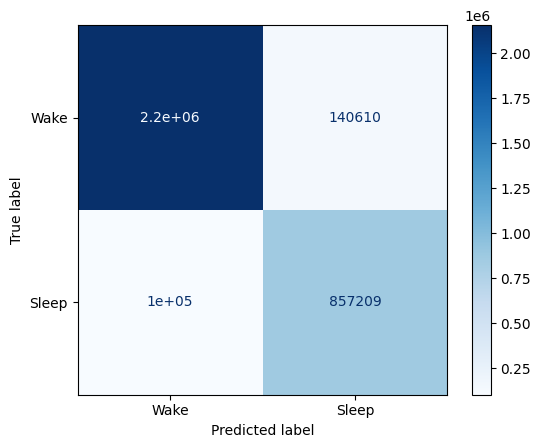

In [19]:
cm_disp =  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Wake', 'Sleep'])
cm_disp.plot(cmap="Blues")

In [20]:
sensibilidade = cm[0, 0] / (cm[0, 0] + cm[0, 1])
especificidade = cm[1, 1] / (cm[1, 1] + cm[1, 0])

print("Sensibilidade: ", sensibilidade)
print("Especificidade: ", especificidade)

Sensibilidade:  0.9387722043835287
Especificidade:  0.8928758174019378


### Métricas

In [21]:
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [22]:
accuracy_score(y_test, y_pred)

0.9252416660525217

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95   2296506
           1       0.86      0.89      0.88    960054

    accuracy                           0.93   3256560
   macro avg       0.91      0.92      0.91   3256560
weighted avg       0.93      0.93      0.93   3256560



In [25]:
rfc_model_2.feature_importances_

array([0.26611492, 0.34554373, 0.38834135])

In [26]:
y_proba = rfc_model_2.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc_score:.2f}")

AUC: 0.96


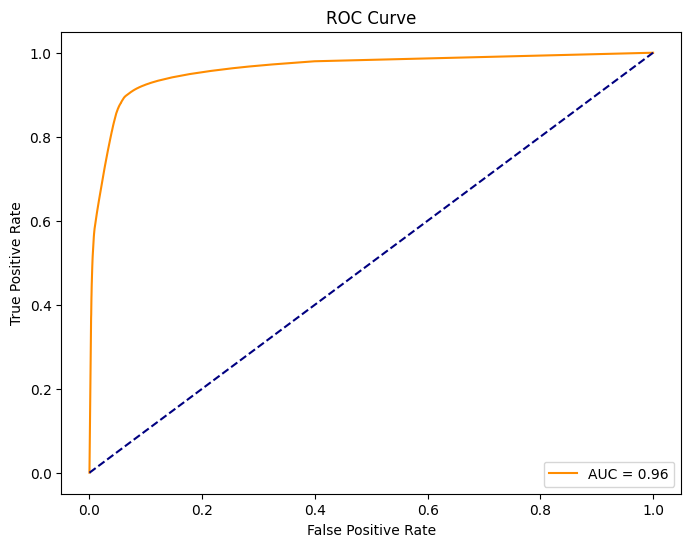

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")  # Linha de desempenho aleatório
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## Testando modelos com a paciente 1345-38

In [17]:
df_teste = pd.read_csv("C:/Users/marim/Documents/Faculdade/TCC/patient_act_data_CSV/1345-38_data_final.csv")
df_teste.head()

,Date,Time,X,Y,Z,T,Sleep,activity_index
0,2018-08-19,00:00:00,0.8582,0.2332,-0.4408,26.3,0,0.004623
1,2018-08-19,00:00:00,0.8582,0.2528,-0.4527,26.3,0,0.004623
2,2018-08-19,00:00:00,0.8582,0.2489,-0.4488,26.3,0,0.004623
3,2018-08-19,00:00:00,0.8700,0.2450,-0.4527,26.3,0,0.004623
4,2018-08-19,00:00:00,0.8425,0.2528,-0.4488,26.3,0,0.004623


In [18]:
# Aplicando o teste na variável X:
shapiro_teste_X = stats.shapiro(df_teste['X'])
print("X: ", shapiro_teste_X)

# Aplicando o teste na variável Y:
shapiro_teste_Y = stats.shapiro(df_teste['Y'])
print("Y: ", shapiro_teste_Y)

# Aplicando o teste na variável Z:
shapiro_teste_Z = stats.shapiro(df_teste['Z'])
print("Z: ", shapiro_teste_Z)

# Aplicando o teste na variável T:
shapiro_teste_T = stats.shapiro(df_teste['T'])
print("T: ", shapiro_teste_T)

# Aplicando o teste na variável Activity index:
shapiro_teste_act_id = stats.shapiro(df_teste['activity_index'])
print("Activity index: : ", shapiro_teste_act_id)

C:\Users\marim\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8640000.
  res = hypotest_fun_out(*samples, **kwds)


X:  ShapiroResult(statistic=np.float64(0.9276826829994701), pvalue=np.float64(1.7676621559989566e-153))
Y:  ShapiroResult(statistic=np.float64(0.985305524799351), pvalue=np.float64(1.0372409038397269e-106))
Z:  ShapiroResult(statistic=np.float64(0.9585425475302244), pvalue=np.float64(3.5779813001244595e-136))
T:  ShapiroResult(statistic=np.float64(0.9582439048239663), pvalue=np.float64(2.1729797695329507e-136))
Activity index: :  ShapiroResult(statistic=np.float64(0.8760348376438957), pvalue=np.float64(3.0503531368561825e-171))


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_teste[['X']])
df_teste['X'] = scaler.transform(df_teste[['X']])

scaler.fit(df_teste[['Y']])
df_teste['Y'] = scaler.transform(df_teste[['Y']])

scaler.fit(df_teste[['Z']])
df_teste['Z'] = scaler.transform(df_teste[['Z']])

scaler.fit(df_teste[['T']])
df_teste['T'] = scaler.transform(df_teste[['T']])

scaler.fit(df_teste[['activity_index']])
df_teste['activity_index'] = scaler.transform(df_teste[['activity_index']])

print(df_teste.head())

         Date      Time         X         Y         Z         T  Sleep  \
0  2018-08-19  00:00:00  1.882349  0.528234 -0.694245 -2.572017      0   
1  2018-08-19  00:00:00  1.882349  0.567210 -0.714713 -2.572017      0   
2  2018-08-19  00:00:00  1.882349  0.559454 -0.708005 -2.572017      0   
3  2018-08-19  00:00:00  1.902242  0.551699 -0.714713 -2.572017      0   
4  2018-08-19  00:00:00  1.855881  0.567210 -0.708005 -2.572017      0   

   activity_index  
0       -0.988397  
1       -0.988397  
2       -0.988397  
3       -0.988397  
4       -0.988397  


In [8]:
X_test_1 = df_teste.drop(['Date', 'Time','Sleep'], axis=1)
y_test_1 = df_teste['Sleep']

In [20]:
X_test_2 = df_teste.drop(['Date', 'Time', 'T', 'activity_index', 'Sleep'], axis=1)
y_test_2 = df_teste['Sleep']

In [1]:
from joblib import dump, load

rfc_model_1_teste = load("rfc_model_1.joblib") 

In [9]:
y_pred_teste_1 = rfc_model_1_teste.predict(X_test_1)
y_pred_teste_1

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
y_pred_teste_2 = rfc_model_2.predict(X_test_2)
y_pred_teste_2

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

### Métrica do modelo 1

[[6013662  531336]
 [1760165  334837]]


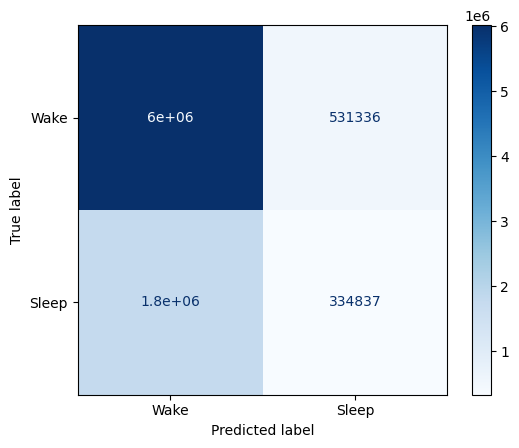

In [14]:
cm = confusion_matrix(y_test_1, y_pred_teste_1)
print(cm)
# cm = [[TP, FN], [FP, TN]]

cm_disp =  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Wake', 'Sleep'])
cm_disp.plot(cmap="Blues")

In [15]:
sensibilidade = cm[0, 0] / (cm[0, 0] + cm[0, 1])
especificidade = cm[1, 1] / (cm[1, 1] + cm[1, 0])

print("Sensibilidade: ", sensibilidade)
print("Especificidade: ", especificidade)

Sensibilidade:  0.9188180042224612
Especificidade:  0.15982657773119072


In [17]:
print(classification_report(y_test_1, y_pred_teste_1))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84   6544998
           1       0.39      0.16      0.23   2095002

    accuracy                           0.73   8640000
   macro avg       0.58      0.54      0.53   8640000
weighted avg       0.68      0.73      0.69   8640000



In [19]:
y_proba_teste_1 = rfc_model_1_teste.predict_proba(X_test_1)[:, 1]
auc_score = roc_auc_score(y_test_1, y_proba_teste_1)
print(f"AUC: {auc_score:.2f}")

AUC: 0.76


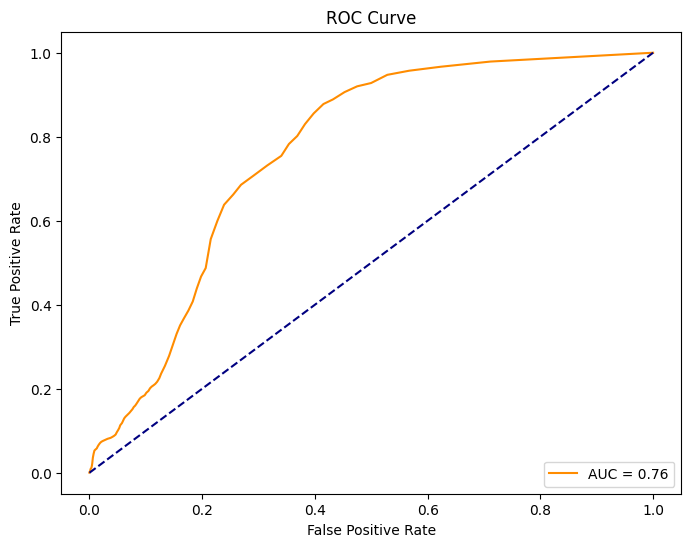

In [20]:
fpr, tpr, thresholds = roc_curve(y_test_1, y_proba_teste_1)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")  # Linha de desempenho aleatório
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Métricas do modelo 2

[[6368499  176499]
 [2038141   56861]]


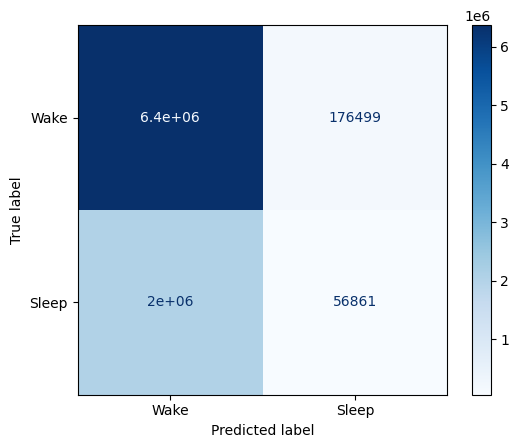

In [24]:
cm = confusion_matrix(y_test_2, y_pred_teste_2)
print(cm)
# cm = [[TP, FN], [FP, TN]]

cm_disp =  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Wake', 'Sleep'])
cm_disp.plot(cmap="Blues")

In [25]:
sensibilidade = cm[0, 0] / (cm[0, 0] + cm[0, 1])
especificidade = cm[1, 1] / (cm[1, 1] + cm[1, 0])

print("Sensibilidade: ", sensibilidade)
print("Especificidade: ", especificidade)

Sensibilidade:  0.973032994051335
Especificidade:  0.027141262872302747


In [27]:
print(classification_report(y_test_2, y_pred_teste_2))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85   6544998
           1       0.24      0.03      0.05   2095002

    accuracy                           0.74   8640000
   macro avg       0.50      0.50      0.45   8640000
weighted avg       0.63      0.74      0.66   8640000



In [29]:
y_proba_teste_2 = rfc_model_2.predict_proba(X_test_2)[:, 1]
auc_score = roc_auc_score(y_test_2, y_proba_teste_2)
print(f"AUC: {auc_score:.2f}")

AUC: 0.53


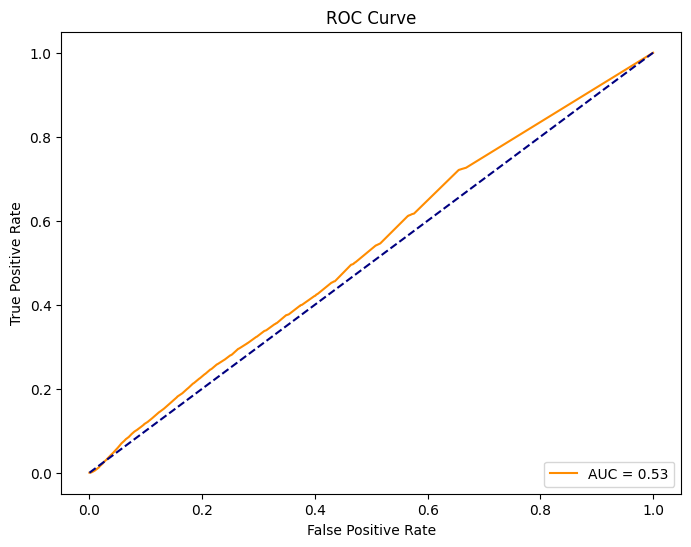

In [31]:
fpr, tpr, thresholds = roc_curve(y_test_2, y_proba_teste_2)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")  # Linha de desempenho aleatório
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()